## Background Information on Your Task

You are a **quantitative researcher** working with a commodity trading desk. Alex, a VP on the desk, wants to start trading **natural gas storage contracts**. However, the available market data must be of higher quality to enable the instrument to be priced accurately.

They have sent you an email asking you to help **extrapolate the data** available from external feeds to provide more **granularity**, considering **seasonal trends** in the price as it relates to **months in the year**. 

To price the contract, we will need **historical data** and an **estimate of the future gas price** at any date.

---

### About Commodity Storage Contracts

Commodity storage contracts represent deals between **warehouse (storage) owners** and participants in the **supply chain** (refineries, transporters, distributors, etc.). 

The deal is typically an agreement to **store an agreed quantity** of any physical commodity (oil, natural gas, agriculture) in a warehouse for a specified amount of time.

#### Key Terms of Such Contracts:
- Periodic fees for storage
- Limits on withdrawals/injections of a commodity
- Injection date: when the commodity is purchased and stored
- Withdrawal date: when the commodity is withdrawn from storage and sold

A client could be anyone within the commodities supply chain:
- **Producers**
- **Refiners**
- **Transporters**
- **Distributors**
- **Firms (e.g., commodity trading firms, hedge funds)**

These clients aim to take advantage of **seasonal or intra-day price differentials** in physical commodities.

📌 **Example**: A firm may choose to **buy natural gas in summer** and **sell it in winter**, using underground storage to hold the inventory and profit from the seasonal price differences.

---

## Your Task

After asking around for the source of the existing data, you learn the current process is:
- A **monthly snapshot** of prices from a market data provider
- Represents the **market price of natural gas delivered at the end of each calendar month**
- Data is available for roughly the **next 18 months**
- Combined with historical prices in a **time series database**

You gain access and **download the data in a CSV file**.

### What You Need to Do:
- Download the monthly natural gas price data
- Each point corresponds to the purchase price at the end of a month, from **31st October 2020** to **30th September 2024**
- **Analyze the data** to:
  - Estimate the **purchase price of gas** at any **past** date
  - **Extrapolate** it for **one year into the future**

🧠 Your code should:
- Take a **date as input**
- Return a **price estimate**

---

### Additional Guidance

Try to:
- **Visualize the data** to find patterns
- Consider factors causing price variation (e.g., **seasonal trends**)
- Ignore market holidays, weekends, and bank holidays

📌 **Note**: This role often requires knowledge of:
- **Data analysis**
- **Machine learning**

## ✅ Step 1: Load & Inspect the Data

#### 🔹1.1. Import the necessary libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 🔹1.2. Load the data

In [82]:
# Load the CSV file
df = pd.read_csv("Nat_Gas.csv")

# Show the first few rows
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


#### 🔹1.3. Check data info and types

In [83]:
# Check the shape and column names
print("Shape:", df.shape)
print('-------------')
print("Columns:", df.columns)
print('-------------')
# Check data types and missing values
print(df.info())
print('-------------')
print(df.isnull().sum())


Shape: (48, 2)
-------------
Columns: Index(['Dates', 'Prices'], dtype='object')
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dates   48 non-null     object 
 1   Prices  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes
None
-------------
Dates     0
Prices    0
dtype: int64


#### 🔹1.4. Convert 'Date' column to datetime

In [84]:
# Convert Date to datetime
df['Dates'] = pd.to_datetime(df['Dates'])

# Sort by date just in case
df = df.sort_values('Dates').reset_index(drop=True)

# Quick summary stats
df.describe()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_12224\2603064510.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


,Dates,Prices
count,48,48.000000
mean,2022-10-15 08:00:00,11.207083
min,2020-10-31 00:00:00,9.840000
25%,2021-10-23 06:00:00,10.650000
50%,2022-10-15 12:00:00,11.300000
75%,2023-10-07 18:00:00,11.625000
max,2024-09-30 00:00:00,12.800000
std,NaN,0.757897


In [85]:
# check data types again
df.dtypes

Dates     datetime64[ns]
Prices           float64
dtype: object

## ✅ Step 2: Visualize Natural Gas Price Trends

#### 🔹2.1. Line plot: Price over time

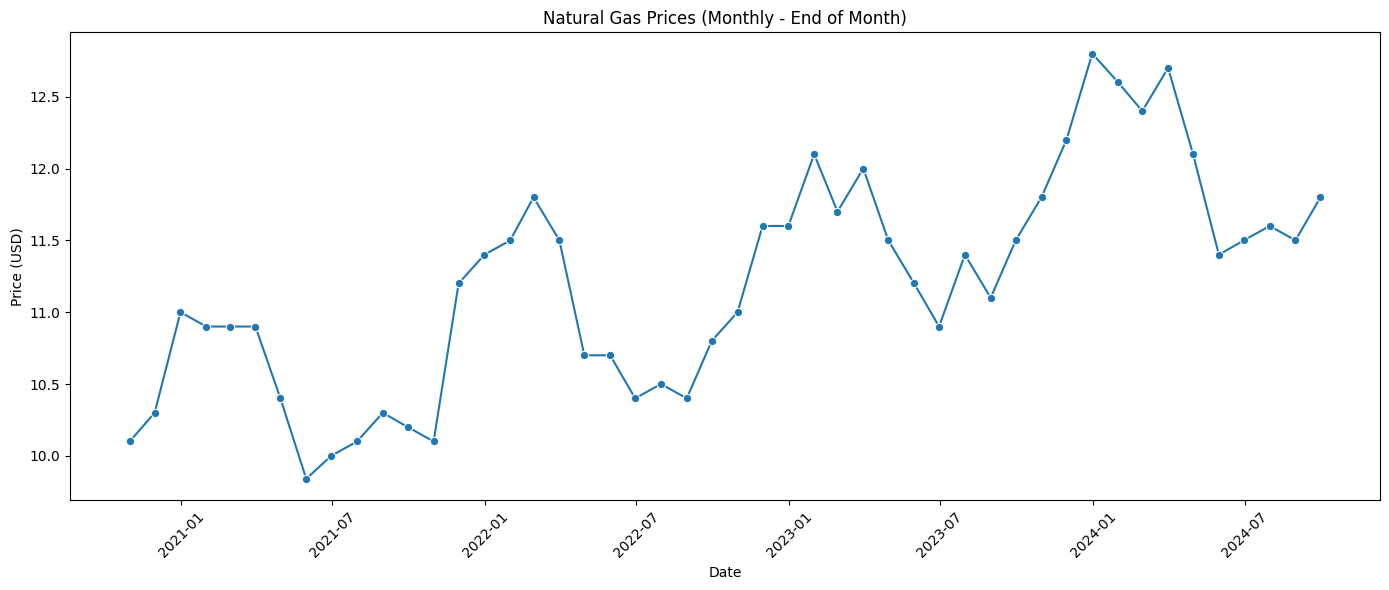

In [86]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='Dates', y='Prices', data=df, marker='o')
plt.title("Natural Gas Prices (Monthly - End of Month)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 🔹2.2. Boxplot by Month: Seasonal behavior
This helps us answer: Are winter months (e.g., Jan, Dec) typically more expensive?

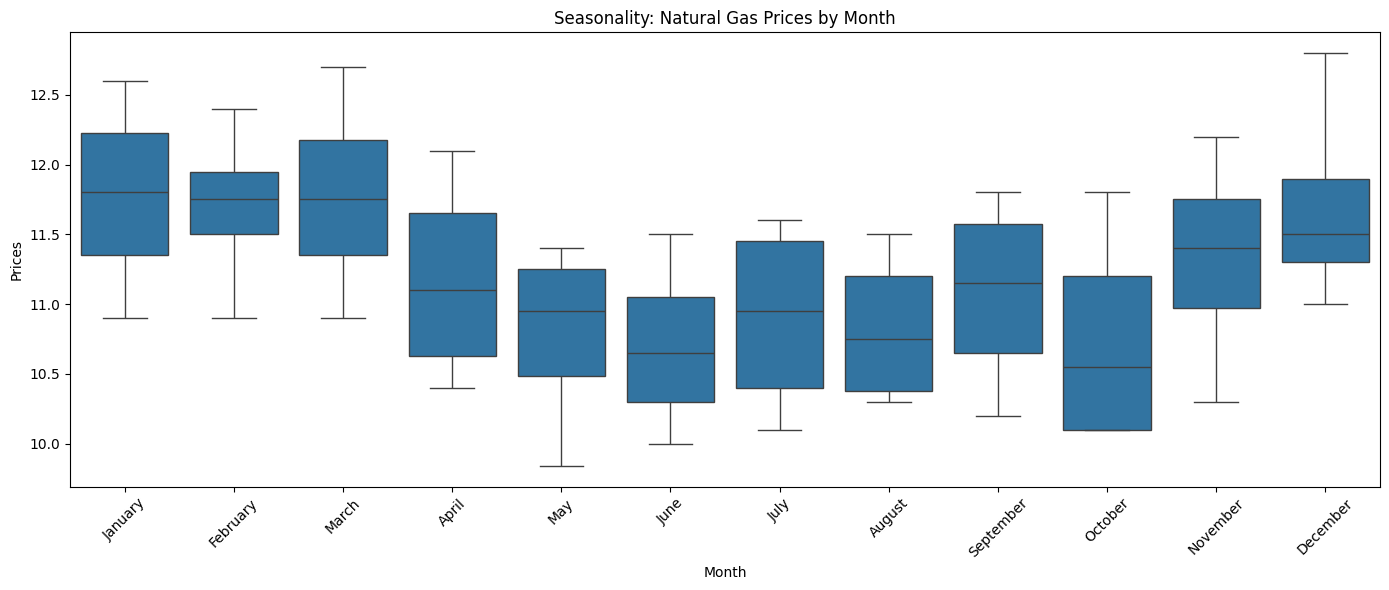

In [87]:
# Extract month as name for seasonality analysis
df['Month'] = df['Dates'].dt.month_name()

# Order the months for display
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

plt.figure(figsize=(14, 6))
sns.boxplot(x='Month', y='Prices', data=df, order=month_order)
plt.title("Seasonality: Natural Gas Prices by Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 2.3. Monthly average trend

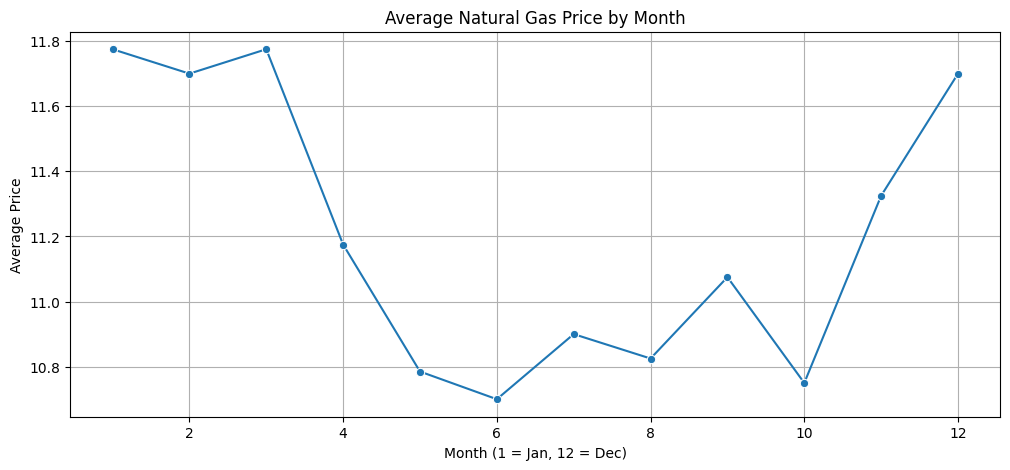

In [88]:
monthly_avg = df.groupby(df['Dates'].dt.month)['Prices'].mean()

plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
plt.title("Average Natural Gas Price by Month")
plt.xlabel("Month (1 = Jan, 12 = Dec)")
plt.ylabel("Average Price")
plt.grid(True)
plt.show()


### 📈 Seasonal Analysis of Natural Gas Prices
##### 📌 Observations:
- Based on the boxplot and line plot visualizations:
    - Highest prices occur between December and March, which aligns with winter months in the northern hemisphere.
    - Lowest prices are typically seen between May and October, corresponding to summer and early fall.
- This seasonal pattern suggests increased demand for natural gas during colder months, likely due to heating needs, and a reduction in demand during warmer months.
#### 📊 Implications:
- This seasonality is crucial for:
    - Energy traders and market analysts to time trades.
    - Policy makers to anticipate price surges.
    - Utility companies for demand planning and resource allocation.

## ✅ Step 3: Interpolate Daily Prices
#### Objective:
Transform the monthly data into a smooth daily series using interpolation.

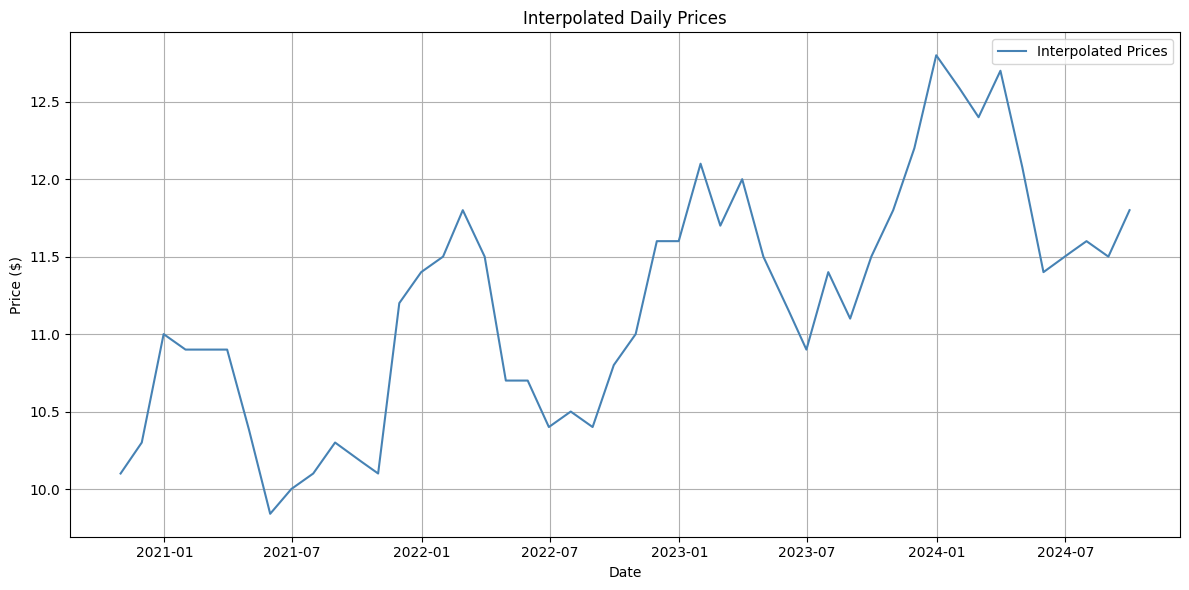

In [89]:
# Set Dates column as datetime index
df.set_index('Dates', inplace=True)

# Create a new daily index
daily_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')

# Reindex to include all daily dates
df_daily = df.reindex(daily_index)

# Interpolate missing values (linear works well for prices)
df_daily['Prices'] = df_daily['Prices'].interpolate(method='linear')
interpolated_series = df_daily['Prices']


# Clean up index name
df_daily.index.name = 'Date'

# Plot to verify
plt.figure(figsize=(12,6))
plt.plot(df_daily.index, df_daily['Prices'], label='Interpolated Prices', color='steelblue')
plt.title('Interpolated Daily Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()



## ✅ Step 4: Extrapolate 1 Year Into the Future
We will forecast from the last date (e.g., Sep 30, 2024) to Sep 30, 2025.

### ✅ Seasonal Decomposition + Trend (recommended for simplicity)

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Resample to monthly average 
monthly_prices = df_daily['Prices'].resample('ME').mean()

# Decompose (additive or multiplicative depending on the nature of the data)
result = seasonal_decompose(monthly_prices, model='additive')

# Extract components
trend = result.trend.dropna()
seasonal = result.seasonal[:12]  # assume 12-month seasonality

# Forecast next 12 months: use last known trend value and repeat seasonal pattern
last_trend = trend[-1]
future_months = pd.date_range(start=monthly_prices.index[-1] + pd.DateOffset(months=1), periods=12, freq='ME')

# Repeat seasonal pattern and add trend
forecast_prices = pd.Series([last_trend + seasonal[i % 12] for i in range(12)], index=future_months)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_12224\272112121.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_trend = trend[-1]
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12224\272112121.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_prices = pd.Series([last_trend + seasonal[i % 12] for i in range(12)], index=future_months)


## ✅ Step 5: Build a Query Function
#### This function will allow estimating any date price, whether it's in the original range (interpolated) or forecasted.

In [91]:
def estimate_price_range(start_date, end_date, interpolated_series, forecast_prices):
    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date)

    combined = pd.concat([interpolated_series, forecast_prices])
    result = combined[(combined.index >= start) & (combined.index <= end)]

    if result.empty:
        raise ValueError("Date range is out of the supported range.")

    return pd.DataFrame(result).rename(columns={0: 'Estimated Price'})
# Example: Get forecast from Jan to Mar 2025
estimate_price_range('2025-01-01', '2025-03-31', interpolated_series, forecast_prices)

,Estimated Price
2025-01-31,12.651378
2025-02-28,12.624633
2025-03-31,12.589771


## ✅ Step 6: Final Visualizations

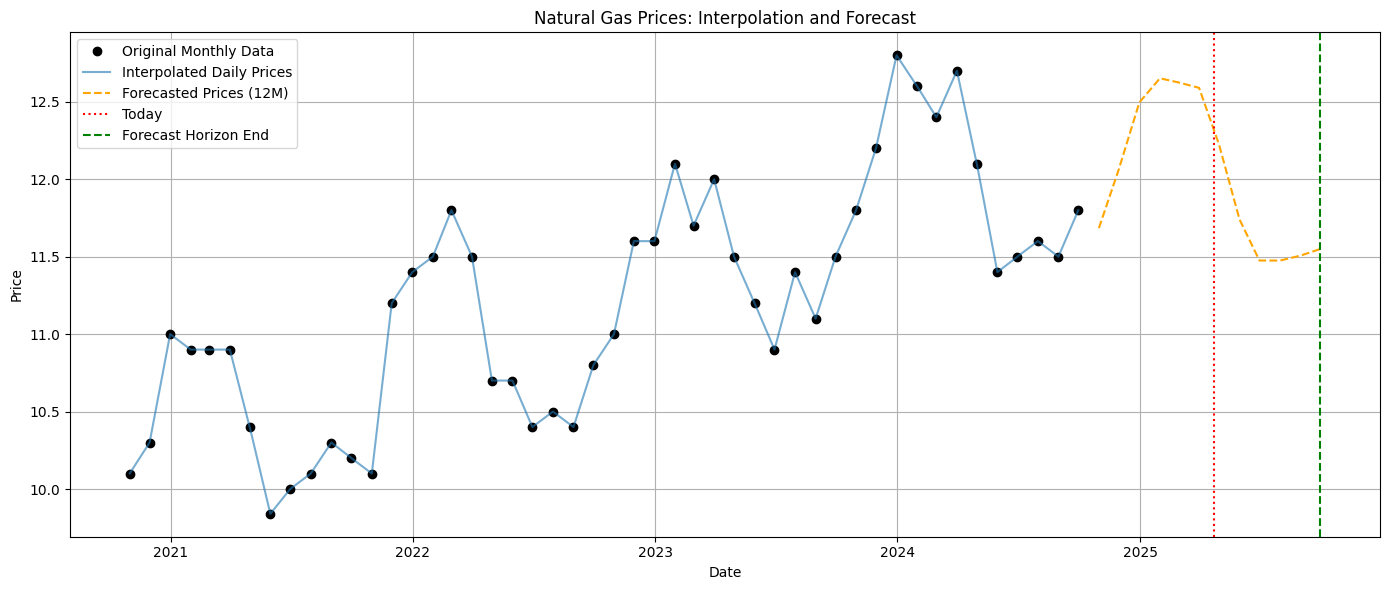

In [92]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Prices'], 'o', label='Original Monthly Data', color='black')
plt.plot(df_daily.index, df_daily['Prices'], label='Interpolated Daily Prices', alpha=0.6)
plt.plot(forecast_prices.index, forecast_prices.values, '--', label='Forecasted Prices (12M)', color='orange')

# Add vertical line for today
plt.axvline(pd.Timestamp.today(), color='red', linestyle=':', label='Today')

# Add vertical line for forecast horizon end
plt.axvline(forecast_prices.index[-1], color='green', linestyle='--', label='Forecast Horizon End')

plt.legend()
plt.title('Natural Gas Prices: Interpolation and Forecast')
plt.ylabel('Price')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()


## ✅ Step 7. Final Summary
**Summary**
- Successfully interpolated monthly prices to daily frequency.
- Used seasonal decomposition + trend extension for 12-month forecasting.
- Built interactive query function for forecasting specific date ranges.
- Final visualization highlights forecast horizon clearly.

**Next Steps (optional ideas):**
- Incorporate external drivers (e.g., temperature, demand shocks)
- Use Prophet or SARIMA for deeper statistical modeling
- Build a simple web dashboard in Streamlit or Power BI
